<a href="https://colab.research.google.com/github/moaztayea/Credit-Card-Defaulters/blob/main/NEW_MULTI_CLASSIFICATION_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from xgboost import XGBClassifier
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.utils import shuffle
from yellowbrick.classifier import ROCAUC
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 5.4 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


# Read Datase

In [ ]:
# read train dataset
default_df = pd.read_csv("/content/drive/MyDrive/Credit- Card-Default/UCI_Credit_Card.csv")

In [ ]:
# show random 10 sample of our dataset
default_df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
4062,4063,110000.00,2,3,1,44,0,0,0,0,...,135888.00,137708.00,78581.00,4861.00,4300.00,3500.00,3500.00,2564.00,2300.00,0
16782,16783,20000.00,1,2,2,31,0,0,0,0,...,17164.00,17294.00,16110.00,1230.00,1265.00,2192.00,694.00,0.00,3134.00,1
25936,25937,260000.00,2,1,1,30,1,-2,-2,-2,...,0.00,0.00,36150.00,0.00,0.00,0.00,0.00,36150.00,0.00,0
1463,1464,300000.00,2,2,1,50,-1,-1,-1,0,...,110680.00,104016.00,109839.00,3131.00,121715.00,4000.00,5000.00,9000.00,5000.00,0
18496,18497,170000.00,2,2,2,25,0,0,0,0,...,42793.00,30466.00,25583.00,2019.00,2006.00,2002.00,788.00,989.00,1000.00,0
13220,13221,30000.00,1,2,2,25,0,0,0,0,...,18794.00,23530.00,23531.00,1338.00,1500.00,1000.00,5000.00,2000.00,24.00,0
17700,17701,170000.00,2,2,1,49,-1,0,0,0,...,15429.00,16594.00,14035.00,3557.00,8245.00,5429.00,4500.00,5415.00,6000.00,0
22923,22924,500000.00,2,1,1,36,0,0,0,-1,...,15406.00,6196.00,45045.00,26000.00,11725.00,15406.00,6903.00,45045.00,10000.00,0
28760,28761,140000.00,2,2,1,33,0,0,0,-2,...,-1037.00,66441.00,68365.00,3133.00,0.00,0.00,68383.00,3000.00,3096.00,0
17774,17775,110000.00,2,2,1,54,2,2,2,0,...,92097.00,96509.00,93773.00,3400.00,0.00,3290.00,7000.00,0.00,3500.00,1


# Rename columns

In [ ]:
default_df['Defaulter'] =default_df ['default.payment.next.month']
default_df=default_df.drop('default.payment.next.month',axis = 1)

In [ ]:
#renaming columns 
default_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
default_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
default_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
default_df["EDUCATION"]=default_df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [ ]:
default_df["MARRIAGE"]=default_df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

# Feature Engineering


In [ ]:
# Define a function that applies the logic to each row
def create_new_feature(row):
    new_feature = 0
    for feature in row[['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']]:
        if feature > 0:
            new_feature += feature
            if new_feature > 9:
              new_feature = 9
    return new_feature

# Create the new column by applying the function to each row
default_df['Delay_months'] = default_df.apply(create_new_feature, axis=1)

# Splitting target from features

In [ ]:
X=default_df.drop(['Defaulter','Delay_months'],axis = 1)
y=default_df['Delay_months']

In [ ]:
y = y.astype('int64')

# Confusion Matrix and classification report

In [ ]:
# Print Confusion Matrix and classification report
def eva(y_test,algo_y_pred):
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, algo_y_pred)
  print(metrics.classification_report(y_test, algo_y_pred))
  plt.show()

# train_test_split

In [ ]:
# Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify = y)

# Scaling with RobustScaler

In [ ]:
# use Robust Scaler to reduce the effect of outliers in our dataset
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test) 

# BaseLine

In [ ]:
base_line = [y_test.mean()] * len(y_test)

In [ ]:
mae_base_line = metrics.mean_absolute_error(y_test, base_line)
print(f'Mean Absolute Error for Base line Model = {mae_base_line}')

Mean Absolute Error for Base line Model = 1.96212


## Decision Tree SMOTE

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_robust, y_train)

# Perform cross-validation and make predictions on the testing data
dt_y_pred = cross_val_predict(dt_classifier, X_test_robust, y_test, cv=5)

# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, dt_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, dt_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, dt_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))



F1 Score: 0.9841680954186925
Precision: 0.9841859966694573
Recall: 0.9841666666666666
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  331    2    0    0    0    0    0    0    0]
 [   0    1  550    0    1    1    0    0    0    0]
 [   0    0    0  141    2    3    3    0    0    0]
 [   0    0    6    0  193    0    8    0    0    0]
 [   0    0    0    3    1   88    2    3    0    0]
 [   0    0    0    2    8    2  105    2    4    2]
 [   0    0    0    1    0    2    5   66    3    1]
 [   0    0    0    0    0    0    4    3   88    8]
 [   0    0    0    0    0    1    1    2    8  357]]


## LGBMClassifier SMOTE 

In [ ]:
# LGBMClassifier with scaled data
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(X_train_robust, y_train)

# Perform cross-validation and make predictions on the testing data
lgbm_y_pred = cross_val_predict(lgbm_classifier, X_test_robust, y_test, cv=5)

# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, lgbm_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, lgbm_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, lgbm_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_y_pred))


F1 Score: 0.9669226355548285
Precision: 0.9671156701925789
Recall: 0.968
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  333    0    0    0    0    0    0    0    0]
 [   0    0  550    1    1    1    0    0    0    0]
 [   0   11    8  128    0    1    0    1    0    0]
 [   0    0   19    0  179    2    5    0    2    0]
 [   0    3    0   10    9   68    1    3    1    2]
 [   0    0    1    1   28    2   86    2    3    2]
 [   0    0    0    1    4   11    5   46    1   10]
 [   0    0    0    0    4    1    9    1   76   12]
 [   0    0    0    0    1    1    2    1    8  356]]


## HistGradientBoostingClassifier SMOTE

In [ ]:
# HistGradientBoostingClassifier with scaled data
hist_classifier = HistGradientBoostingClassifier(random_state=42)
hist_classifier.fit(X_train_robust, y_train)
# Perform cross-validation and make predictions on the testing data
hist_y_pred = cross_val_predict(hist_classifier, X_test_robust, y_test, cv=5)
# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, hist_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, hist_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, hist_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, hist_y_pred))

F1 Score: 0.9688050705715012
Precision: 0.9686515602728699
Recall: 0.9696666666666667
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  333    0    0    0    0    0    0    0    0]
 [   0    0  552    0    0    1    0    0    0    0]
 [   0    8    6  132    0    2    0    1    0    0]
 [   0    0   21    0  176    2    7    0    1    0]
 [   0    2    2   10    9   70    1    2    1    0]
 [   0    0    1    0   27    3   84    3    5    2]
 [   0    0    0    2    1   10   10   49    1    5]
 [   0    0    0    0    2    1    7    2   81   10]
 [   0    0    0    0    0    1    1    2   10  355]]


## RANDOM FOREST SMOTE 

In [ ]:
# RandomForestClassifier with scaling data and with oversampling using SMOTE
rfc_classifier=RandomForestClassifier(random_state=42)
rfc_classifier.fit(X_train_robust, y_train)
# Perform cross-validation and make predictions on the testing data
rfc_y_pred = cross_val_predict(rfc_classifier, X_test_robust, y_test, cv=5)
# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, rfc_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, rfc_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, rfc_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_y_pred))

F1 Score: 0.9713134914167575
Precision: 0.9714415122044634
Recall: 0.9718333333333333
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  333    0    0    0    0    0    0    0    0]
 [   3    1  545    4    0    0    0    0    0    0]
 [   0   13    6  130    0    0    0    0    0    0]
 [   1    0   25    0  181    0    0    0    0    0]
 [   0    1    0    4   18   70    4    0    0    0]
 [   0    0    1    0   20    7   95    1    1    0]
 [   0    0    0    0    2    9   11   54    1    1]
 [   0    0    0    0    1    0    2    5   87    8]
 [   0    0    0    0    0    0    2    4   13  350]]


## XGBClassifier SMOTE

In [ ]:
# XGBClassifier with scaled data and with oversampling using SMOTE
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_robust, y_train)
# Perform cross-validation and make predictions on the testing data
xgb_y_pred = cross_val_predict(xgb_clf, X_test_robust, y_test, cv=5)
# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, xgb_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, xgb_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, xgb_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))


F1 Score: 0.9627544802516641
Precision: 0.9633488423518165
Recall: 0.9641666666666666
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  331    0    2    0    0    0    0    0    0]
 [   4    0  544    4    1    0    0    0    0    0]
 [   0   14    2  133    0    0    0    0    0    0]
 [   0    0   65    0  137    0    5    0    0    0]
 [   0    0    2   18    7   66    1    2    1    0]
 [   0    1    5    1   20    5   90    1    1    1]
 [   0    0    0    0    4   18    6   48    0    2]
 [   0    0    0    0    1    1    0    3   92    6]
 [   0    0    0    0    0    1    1    1    8  358]]


In [ ]:
lgbm_score = f1_score(y_test, lgbm_y_pred, average="weighted")
hist_score = f1_score(y_test, hist_y_pred, average="weighted")
xgb_score = f1_score(y_test, xgb_y_pred, average="weighted")
rfc_score = f1_score(y_test, rfc_y_pred, average="weighted")
dt_score= f1_score(y_test, dt_y_pred, average="weighted")

In [ ]:
import plotly.express as px

In [ ]:
# initialize Values
techniques = ['Hist  Score', 'LGBM  Score', 'XGB  Score', 'DT  Score','RF Score']
techniques_scores = [hist_score, lgbm_score, xgb_score, dt_score, rfc_score]

In [ ]:
# Plot The Result Using Plotly
px.bar(x=techniques, y=techniques_scores, color=techniques, title="Techniques Scores").update_layout(
    xaxis_title="Techniques", 
    yaxis_title="F1_Score"
)

In [ ]:
# plot using seaborn
# plt.figure(figsize=(15, 5))
# plt.title('Techniques ROC_AUC Scores')
# sns.barplot(x=techniques, y=techniques_roc_auc_scores)
# plt.xlabel("Techniques")
# plt.ylabel("ROC_AUC Score")

# RandomOver Sampling

In [ ]:
# initialize RandomOverSampling variable
random_over_sampler = RandomOverSampler(random_state=42)
random_over_sampler_x_train, random_over_sampler_y_train = random_over_sampler.fit_resample(X_train_robust, y_train)

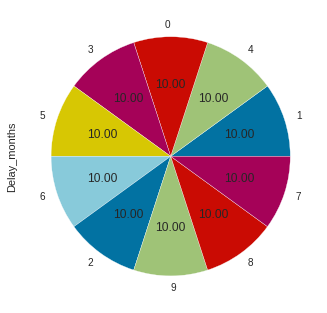

In [ ]:
random_over_sampler_y_train.value_counts().plot.pie(autopct='%.2f')

## Decision Tree RandomOver Sampling

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(random_over_sampler_x_train, random_over_sampler_y_train)

# Perform cross-validation and make predictions on the testing data
dt_ros_y_pred = cross_val_predict(dt_classifier, X_test_robust, y_test, cv=5)

# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, dt_ros_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, dt_ros_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, dt_ros_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_ros_y_pred))



F1 Score: 0.9828530372033953
Precision: 0.9829029922721881
Recall: 0.9828333333333333
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  331    2    0    0    0    0    0    0    0]
 [   0    1  551    0    1    0    0    0    0    0]
 [   0    0    0  139    2    5    3    0    0    0]
 [   0    0    5    0  189    0   11    2    0    0]
 [   0    0    0    4    1   87    1    4    0    0]
 [   0    0    0    2    9    2  103    2    5    2]
 [   0    0    0    2    0    1    6   65    3    1]
 [   0    0    0    0    0    0    4    3   88    8]
 [   0    0    0    0    0    1    2    1    7  358]]


## LGBMClassifier RandomOver Sampling 

In [ ]:
# LGBMClassifier with scaled data
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(random_over_sampler_x_train, random_over_sampler_y_train)

# Perform cross-validation and make predictions on the testing data
lgbm_ros_y_pred = cross_val_predict(lgbm_classifier, X_test_robust, y_test, cv=5)

# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, lgbm_ros_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, lgbm_ros_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, lgbm_ros_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_ros_y_pred))


F1 Score: 0.9669226355548285
Precision: 0.9671156701925789
Recall: 0.968
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  333    0    0    0    0    0    0    0    0]
 [   0    0  550    1    1    1    0    0    0    0]
 [   0   11    8  128    0    1    0    1    0    0]
 [   0    0   19    0  179    2    5    0    2    0]
 [   0    3    0   10    9   68    1    3    1    2]
 [   0    0    1    1   28    2   86    2    3    2]
 [   0    0    0    1    4   11    5   46    1   10]
 [   0    0    0    0    4    1    9    1   76   12]
 [   0    0    0    0    1    1    2    1    8  356]]


## HistGradientBoostingClassifier RandomOver Sampling

In [ ]:
# HistGradientBoostingClassifier with scaled data
hist_classifier = HistGradientBoostingClassifier(random_state=42)
hist_classifier.fit(random_over_sampler_x_train, random_over_sampler_y_train)
# Perform cross-validation and make predictions on the testing data
hist_ros_y_pred = cross_val_predict(hist_classifier, X_test_robust, y_test, cv=5)
# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, hist_ros_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, hist_ros_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, hist_ros_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, hist_ros_y_pred))

F1 Score: 0.9688050705715012
Precision: 0.9686515602728699
Recall: 0.9696666666666667
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  333    0    0    0    0    0    0    0    0]
 [   0    0  552    0    0    1    0    0    0    0]
 [   0    8    6  132    0    2    0    1    0    0]
 [   0    0   21    0  176    2    7    0    1    0]
 [   0    2    2   10    9   70    1    2    1    0]
 [   0    0    1    0   27    3   84    3    5    2]
 [   0    0    0    2    1   10   10   49    1    5]
 [   0    0    0    0    2    1    7    2   81   10]
 [   0    0    0    0    0    1    1    2   10  355]]


## RANDOM FOREST RandomOver Sampling 

In [ ]:
# RandomForestClassifier with scaling data and with oversampling using SMOTE
rfc_classifier=RandomForestClassifier(random_state=42)
rfc_classifier.fit(random_over_sampler_x_train, random_over_sampler_y_train)
# Perform cross-validation and make predictions on the testing data
rfc_ros_y_pred = cross_val_predict(rfc_classifier, X_test_robust, y_test, cv=5)
# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, rfc_ros_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, rfc_ros_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, rfc_ros_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_ros_y_pred))

F1 Score: 0.9713134914167575
Precision: 0.9714415122044634
Recall: 0.9718333333333333
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  333    0    0    0    0    0    0    0    0]
 [   3    1  545    4    0    0    0    0    0    0]
 [   0   13    6  130    0    0    0    0    0    0]
 [   1    0   25    0  181    0    0    0    0    0]
 [   0    1    0    4   18   70    4    0    0    0]
 [   0    0    1    0   20    7   95    1    1    0]
 [   0    0    0    0    2    9   11   54    1    1]
 [   0    0    0    0    1    0    2    5   87    8]
 [   0    0    0    0    0    0    2    4   13  350]]


## XGBClassifier RandomOver Sampling

In [ ]:
# XGBClassifier with scaled data and with oversampling using SMOTE
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(random_over_sampler_x_train, random_over_sampler_y_train)
# Perform cross-validation and make predictions on the testing data
xgb_ros_y_pred = cross_val_predict(xgb_clf, X_test_robust, y_test, cv=5)
# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, xgb_ros_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, xgb_ros_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, xgb_ros_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_ros_y_pred))


F1 Score: 0.9627544802516641
Precision: 0.9633488423518165
Recall: 0.9641666666666666
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  331    0    2    0    0    0    0    0    0]
 [   4    0  544    4    1    0    0    0    0    0]
 [   0   14    2  133    0    0    0    0    0    0]
 [   0    0   65    0  137    0    5    0    0    0]
 [   0    0    2   18    7   66    1    2    1    0]
 [   0    1    5    1   20    5   90    1    1    1]
 [   0    0    0    0    4   18    6   48    0    2]
 [   0    0    0    0    1    1    0    3   92    6]
 [   0    0    0    0    0    1    1    1    8  358]]


## Scores

In [ ]:
lgbm_ros_score = f1_score(y_test, lgbm_ros_y_pred, average="weighted")
hist_ros_score = f1_score(y_test, hist_ros_y_pred, average="weighted")
xgb_ros_score = f1_score(y_test, xgb_ros_y_pred, average="weighted")
rfc_ros_score = f1_score(y_test, rfc_ros_y_pred, average="weighted")
dt_ros_score= f1_score(y_test, dt_ros_y_pred, average="weighted")

In [ ]:
print(lgbm_ros_score) 
print(hist_ros_score)
print(xgb_ros_score)
print(rfc_ros_score)
print(dt_ros_score)

0.9669226355548285
0.9688050705715012
0.9627544802516641
0.9713134914167575
0.9828530372033953


In [ ]:
# initialize Values
techniques = ['Hist ROS Score', 'LGBM ROS Score', 'XGB ROS Score', 'DT ROS Score','RF ROS Score']
techniques_scores = [hist_ros_score, lgbm_ros_score, xgb_ros_score, dt_ros_score, rfc_ros_score]

In [ ]:
# Plot The Result Using Plotly
px.bar(x=techniques, y=techniques_scores, color=techniques, title="Techniques Scores").update_layout(
    xaxis_title="Techniques", 
    yaxis_title="F1_Score"
)

# RandomUnder Sampling

In [ ]:
# initialize RandomUnderSampling variable
random_under_sampler = RandomUnderSampler(random_state=42)
random_under_sampler_x_train, random_under_sampler_y_train = random_under_sampler.fit_resample(X_train_robust, y_train)

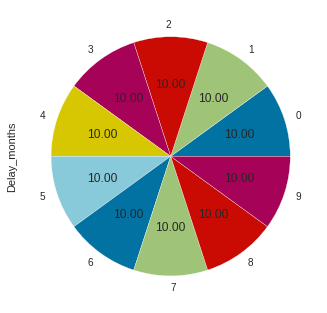

In [ ]:
random_under_sampler_y_train.value_counts().plot.pie(autopct='%.2f')

## Decision Tree RandomUnder Sampling

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(random_under_sampler_x_train, random_under_sampler_y_train)

# Perform cross-validation and make predictions on the testing data
dt_rus_y_pred = cross_val_predict(dt_classifier, X_test_robust, y_test, cv=5)

# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, dt_rus_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, dt_rus_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, dt_rus_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_rus_y_pred))



F1 Score: 0.9838198980613709
Precision: 0.9838490365574157
Recall: 0.9838333333333333
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  332    0    1    0    0    0    0    0    0]
 [   0    1  550    0    1    1    0    0    0    0]
 [   0    0    0  142    2    4    1    0    0    0]
 [   0    0    6    0  194    1    5    1    0    0]
 [   0    0    0    2    2   89    1    3    0    0]
 [   0    0    0    2    7    2  103    6    3    2]
 [   0    0    0    1    0    1    7   66    3    0]
 [   0    0    0    0    0    0    4    4   85   10]
 [   0    0    0    0    0    1    1    3    8  356]]


## LGBMClassifier RandomUnder Sampling 

In [ ]:
# LGBMClassifier with scaled data
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(random_under_sampler_x_train, random_under_sampler_y_train)

# Perform cross-validation and make predictions on the testing data
lgbm_rus_y_pred = cross_val_predict(lgbm_classifier, X_test_robust, y_test, cv=5)

# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, lgbm_rus_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, lgbm_rus_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, lgbm_rus_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_rus_y_pred))


F1 Score: 0.9669226355548285
Precision: 0.9671156701925789
Recall: 0.968
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  333    0    0    0    0    0    0    0    0]
 [   0    0  550    1    1    1    0    0    0    0]
 [   0   11    8  128    0    1    0    1    0    0]
 [   0    0   19    0  179    2    5    0    2    0]
 [   0    3    0   10    9   68    1    3    1    2]
 [   0    0    1    1   28    2   86    2    3    2]
 [   0    0    0    1    4   11    5   46    1   10]
 [   0    0    0    0    4    1    9    1   76   12]
 [   0    0    0    0    1    1    2    1    8  356]]


## HistGradientBoostingClassifier RandomUnder Sampling

In [ ]:
# HistGradientBoostingClassifier with scaled data
hist_classifier = HistGradientBoostingClassifier(random_state=42)
hist_classifier.fit(random_under_sampler_x_train, random_under_sampler_y_train)
# Perform cross-validation and make predictions on the testing data
hist_rus_y_pred = cross_val_predict(hist_classifier, X_test_robust, y_test, cv=5)
# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, hist_rus_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, hist_rus_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, hist_rus_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, hist_rus_y_pred))

F1 Score: 0.9688050705715012
Precision: 0.9686515602728699
Recall: 0.9696666666666667
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  333    0    0    0    0    0    0    0    0]
 [   0    0  552    0    0    1    0    0    0    0]
 [   0    8    6  132    0    2    0    1    0    0]
 [   0    0   21    0  176    2    7    0    1    0]
 [   0    2    2   10    9   70    1    2    1    0]
 [   0    0    1    0   27    3   84    3    5    2]
 [   0    0    0    2    1   10   10   49    1    5]
 [   0    0    0    0    2    1    7    2   81   10]
 [   0    0    0    0    0    1    1    2   10  355]]


## RANDOM FOREST RandomUnder Sampling 

In [ ]:
# RandomForestClassifier with scaling data and with oversampling using SMOTE
rfc_classifier=RandomForestClassifier(random_state=42)
rfc_classifier.fit(random_under_sampler_x_train, random_under_sampler_y_train)
# Perform cross-validation and make predictions on the testing data
rfc_rus_y_pred = cross_val_predict(rfc_classifier, X_test_robust, y_test, cv=5)
# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, rfc_rus_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, rfc_rus_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, rfc_rus_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_rus_y_pred))

F1 Score: 0.9713134914167575
Precision: 0.9714415122044634
Recall: 0.9718333333333333
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  333    0    0    0    0    0    0    0    0]
 [   3    1  545    4    0    0    0    0    0    0]
 [   0   13    6  130    0    0    0    0    0    0]
 [   1    0   25    0  181    0    0    0    0    0]
 [   0    1    0    4   18   70    4    0    0    0]
 [   0    0    1    0   20    7   95    1    1    0]
 [   0    0    0    0    2    9   11   54    1    1]
 [   0    0    0    0    1    0    2    5   87    8]
 [   0    0    0    0    0    0    2    4   13  350]]


## XGBClassifier RandomUnder Sampling

In [ ]:
# XGBClassifier with scaled data and with oversampling using SMOTE
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(random_under_sampler_x_train, random_under_sampler_y_train)
# Perform cross-validation and make predictions on the testing data
xgb_rus_y_pred = cross_val_predict(xgb_clf, X_test_robust, y_test, cv=5)
# Evaluate the model using classification metrics
print("F1 Score:", f1_score(y_test, xgb_rus_y_pred, average="weighted"))
print("Precision:", precision_score(y_test, xgb_rus_y_pred, average="weighted"))
print("Recall:", recall_score(y_test, xgb_rus_y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_rus_y_pred))


F1 Score: 0.9627544802516641
Precision: 0.9633488423518165
Recall: 0.9641666666666666
Confusion Matrix:
 [[3986    0    0    0    0    0    0    0    0    0]
 [   0  331    0    2    0    0    0    0    0    0]
 [   4    0  544    4    1    0    0    0    0    0]
 [   0   14    2  133    0    0    0    0    0    0]
 [   0    0   65    0  137    0    5    0    0    0]
 [   0    0    2   18    7   66    1    2    1    0]
 [   0    1    5    1   20    5   90    1    1    1]
 [   0    0    0    0    4   18    6   48    0    2]
 [   0    0    0    0    1    1    0    3   92    6]
 [   0    0    0    0    0    1    1    1    8  358]]


## RUS Scores

In [ ]:
lgbm_rus_score = f1_score(y_test, lgbm_rus_y_pred, average="weighted")
hist_rus_score = f1_score(y_test, hist_rus_y_pred, average="weighted")
xgb_rus_score = f1_score(y_test, xgb_rus_y_pred, average="weighted")
rfc_rus_score = f1_score(y_test, rfc_rus_y_pred, average="weighted")
dt_rus_score =f1_score(y_test, dt_rus_y_pred, average="weighted")

In [ ]:
print(lgbm_rus_score) 
print(hist_rus_score)
print(xgb_rus_score)
print(rfc_rus_score)
print(dt_rus_score)

0.9669226355548285
0.9688050705715012
0.9627544802516641
0.9713134914167575
0.9838198980613709


In [ ]:
# initialize Values
techniques = ['Hist RUS Score', 'LGBM RUS Score', 'XGB RUS Score', 'DT RUS Score','RF RUS Score']
techniques_scores = [hist_rus_score, lgbm_rus_score, xgb_rus_score, dt_rus_score, rfc_rus_score]

In [ ]:
# Plot The Result Using Plotly
px.bar(x=techniques, y=techniques_scores, color=techniques, title="Techniques Scores").update_layout(
    xaxis_title="Techniques", 
    yaxis_title="F1_Score"
)

In [ ]:
for i in range(len(techniques_scores)):
  print(techniques_scores[i])

0.9688050705715012
0.9669226355548285
0.9627544802516641
0.9838198980613709
0.9713134914167575


In [ ]:
scores = {
    'Hist RUS Score':hist_rus_score , 
    'LGBM RUS Score': lgbm_rus_score, 
    'XGB RUS Score': xgb_rus_score, 
    'DT RUS Score': dt_rus_score ,
    'RF RUS Score': rfc_rus_score
} 

In [ ]:
scores.keys[1]

TypeError: ignored

In [ ]:

for i,j in scores.items():
  print(i,':',j)
  scr = 0
  if j > scr:
    scr = j 
    print(scr)
  # for scs in range(len(scores)):
  #   sc = 1
  #   if j > sc:
  #     sc=j
  #   print(sc)
    

Hist RUS Score : 0.9688050705715012
0.9688050705715012
LGBM RUS Score : 0.9669226355548285
0.9669226355548285
XGB RUS Score : 0.9627544802516641
0.9627544802516641
DT RUS Score : 0.9838198980613709
0.9838198980613709
RF RUS Score : 0.9713134914167575
0.9713134914167575


In [ ]:
len(scores)

5